In [1]:
import numpy as np
import pandas as pd

def raw_data(path):
  data = pd.read_csv(path)
  return data.values


In [9]:
def parzenWindowd(u, sigma):
    if np.abs(u) <= np.abs(1/2):
        return 1
    else:
        return 0

In [10]:
import math

def gaussian(u, sigma):
   #   if  np.abs(u) <=  np.abs(1/2):
      return (1/(math.sqrt(2*math.pi) * sigma)) * math.exp(-(u**2)/(2*sigma**2))
   #   else:
      #   return 0


In [11]:
def kernel(kernelFunction, dataPoint, x, h, sigma):
    dim = len(dataPoint)
    prod = 1
    for j in range(0, dim):
        prod *= kernelFunction((x[j]-dataPoint[j])/h, sigma)
    return prod


def KDE(data_2d, h,X_2d, sigma, kernel_type='gaussian'):
    N = np.size(X_2d, 0)
    d = np.size(data_2d, 1)  
    probs = []  

    if kernel_type == 'parzen':
        K = parzenWindowd
    elif kernel_type == 'gaussian':
        K = gaussian

    for x in X_2d:
        px = 1/N * 1/(h**d) * np.sum([kernel(K, dataPoint, x, h, sigma) for dataPoint in data_2d])
        probs.append(px) 

    return probs

In [2]:
data_2s = raw_data('dataset.csv')
data_2d = data_2s[:,:-1]
print("2D Data: \n", data_2d.shape)


2D Data: 
 (1500, 2)


In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Hs = [0.3,0.6,0.9]
sigmas = [0.2,0.6,0.9]

In [4]:
# generate sample
x = np.linspace(np.amin(data_2d[:, 0]), np.amax(
    data_2d[:, 0]), 50).reshape(-1, 1)
y = np.linspace(np.amin(data_2d[:, 1]), np.amax(
    data_2d[:, 1]), 50).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
X_2d = np.concatenate(
    [xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
print(X_2d.shape)

(2500, 2)


In [15]:
# Parzen Windows PDF
parzenZZs = []
for h in Hs:
    print("h: ",h)
    probs = KDE(data_2d, h,X_2d, 0, 'parzen')
    zz = np.array(probs).reshape(xx.shape)
    parzenZZs.append(zz)

print("End Parzen KDE")

h:  0.3
h:  0.6
h:  0.9
End Parzen KDE


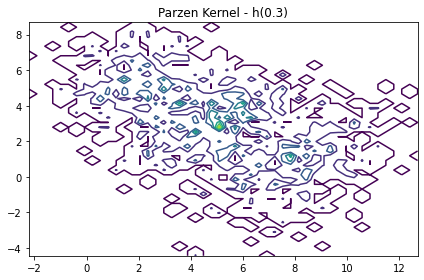

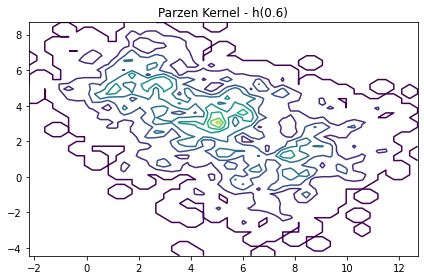

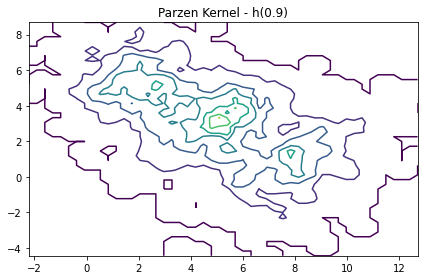

In [16]:
# plot estimated KDE
for i in range(len(Hs)):
    fig, ax = plt.subplots(1)
    ax.contour(xx, yy, parzenZZs[i])
    ax.set_title('Parzen Kernel - h('+str(Hs[i])+')')
    fig.tight_layout()


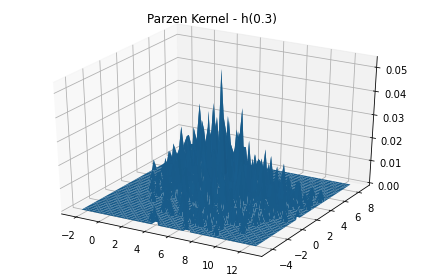

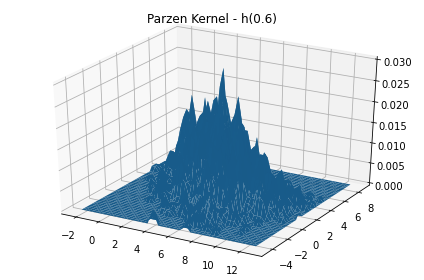

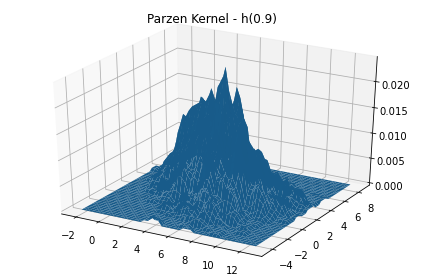

In [17]:
# plot surface plots of KDE
for i in range(len(Hs)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, parzenZZs[i])
    ax.set_title('Parzen Kernel - h('+str(Hs[i])+')')
    fig.tight_layout()


In [22]:
gaussianZZs = []
for h in Hs:
    print("h: ",h)
    for sigma in sigmas:
        print("sigma: ",sigma)
        probs = KDE(data_2d, h, X_2d, sigma, 'gaussian')
        zz = np.array(probs).reshape(xx.shape)
        gaussianZZs.append(zz)

print("End Gaussian KDE")


h:  0.3
sigma:  0.2
sigma:  0.6
sigma:  0.9
h:  0.6
sigma:  0.2
sigma:  0.6
sigma:  0.9
h:  0.9
sigma:  0.2
sigma:  0.6
sigma:  0.9
End Gaussian KDE


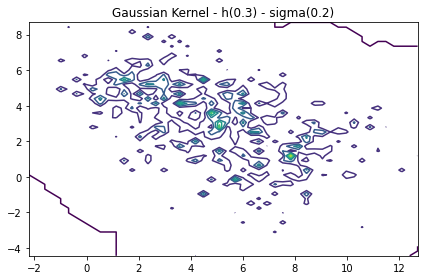

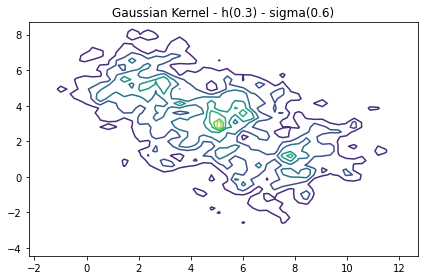

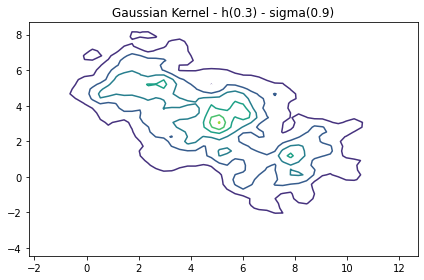

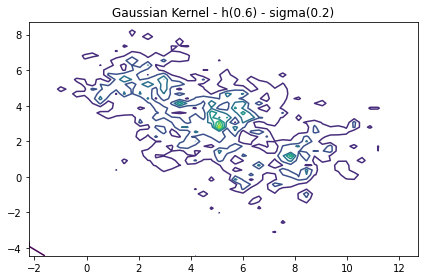

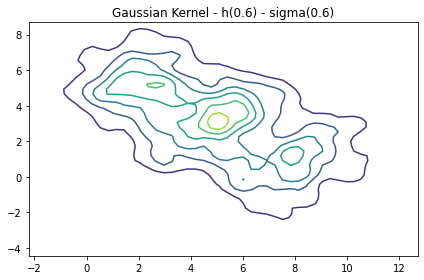

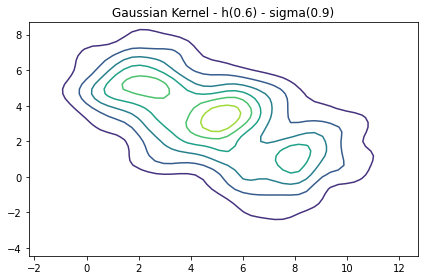

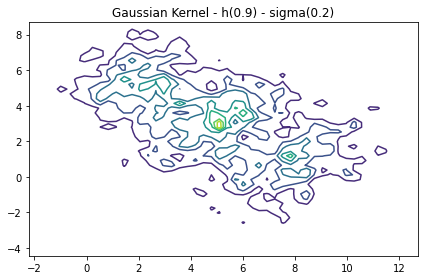

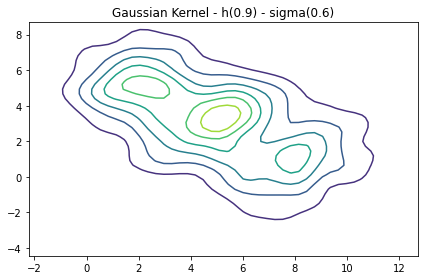

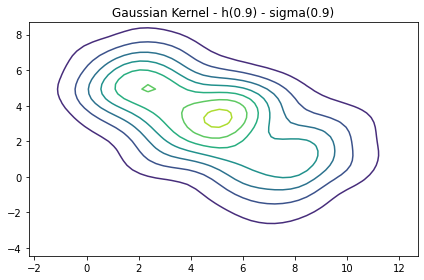

In [23]:
# plot contour plots of KDE
j = -1
for i in range(len(gaussianZZs)):
    if i % len(sigmas) == 0:
        j = j+1
    fig, ax = plt.subplots(1)
    ax.contour(xx, yy, gaussianZZs[i])
    ax.set_title('Gaussian Kernel - h('+str(Hs[j])+') - sigma('+str(sigmas[i%len(sigmas)])+')')
    fig.tight_layout()

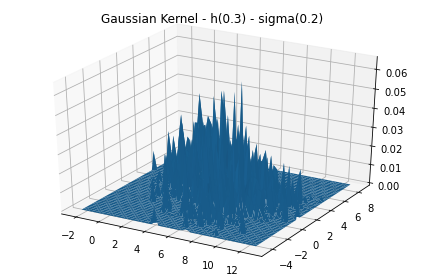

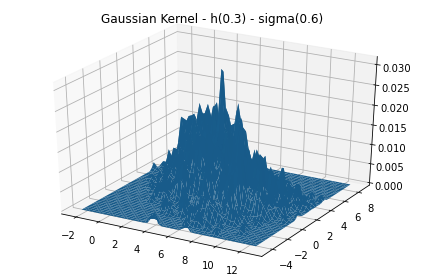

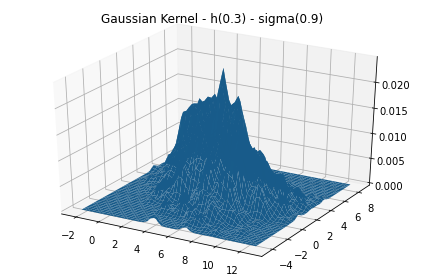

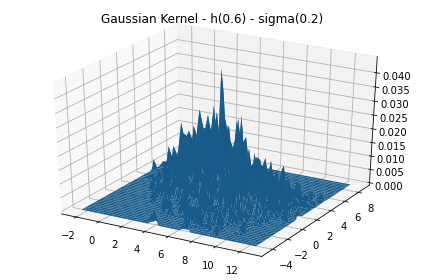

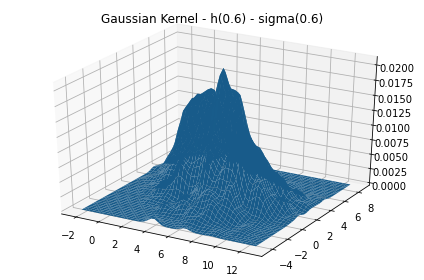

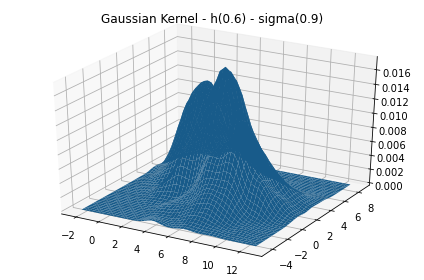

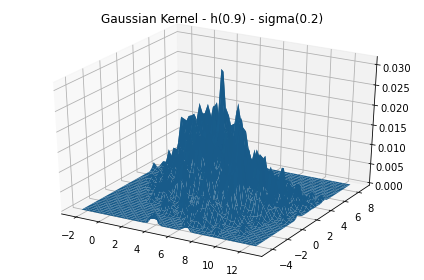

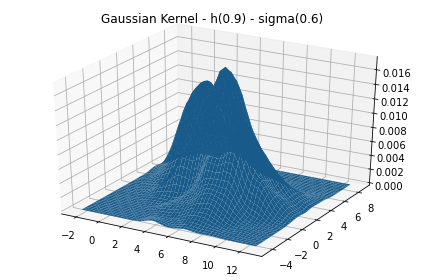

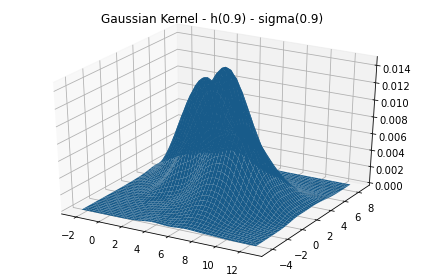

In [24]:
# plot surface plots of KDE
j = -1
for i in range(len(gaussianZZs)):
    if i % len(sigmas) == 0:
        j = j + 1
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, gaussianZZs[i])
    ax.set_title('Gaussian Kernel - h('+str(Hs[j])+') - sigma('+str(sigmas[i%len(sigmas)])+')')
    fig.tight_layout()